In [1]:
import numpy as np
import matplotlib.pyplot as plt

<span><strong style="color: red">IMPORTANT!</strong> If you're reading this on a phone, keep in mind that cells with Python code cannot be resized. If any cell is too large and has hidden text/code, rotate your phone sideways. </span>

<h1 style="text-align: center;">Gradient Descent</h1>

### 1.Introduction:
 - Gradient descent, or the first derivative, is a method used to reach a local maximum of a function, or a local minimum if we take the negative gradient. The idea is to select a random point for "x" and, through small, gradual steps and updating the initial value of "x," traverse the function until reaching a local minimum. The problem is that this approach does not guide us to the global minimum. In other words, if we choose a point where there is a decrease in the function nearby, the gradient will lead us to the local minimum. In the following code, I will demonstrate this.

 - Lastly, I'll demonstrate a binary classification between a cat and a dog with the same body length. Using gradient descent, the computer will predict the outcome based on the information I provide.

### 2.Main Method:
- the main method of gradient descent contains:
  - random function of my choice.
  - first derivative of the function.
  - the starting point from which we begin the traversal.
  - maximum steps we want to take (it can vary).
  - the learning rate is essentially how large the steps we want to take are (also can vary).
  - lastly, text representation of the function itself.

In [2]:
def gradient_descent(func, f_prime, start_point, max_steps, learning_rate, func_str):
  tolerance = 2e-4
  
  x_val_steps = [start_point]
  y_val_steps = [func(start_point)]
  
  x = start_point
  for _ in range(max_steps):
    gradient = f_prime(x)
    x_next = x - gradient * learning_rate
    
    x_val_steps.append(x_next)
    y_val_steps.append(func(x_next))
    
    if abs(x_next - x) < tolerance:
      break

    x = x_next
  
  x_values=np.linspace(-10, 10, 500)
  x_curve = x_values
  y_curve = func(x_curve)
  
  x_min, y_min = x, func(x)
  
  plt.figure(figsize=(10, 7))
  plt.plot(x_curve, y_curve, label=f"y = {func_str}", color='blue')
  plt.scatter(x_min, y_min, color='green', label=f"Min point at x={round(x_min, 2)}, y={round(y_min, 2)}", zorder=6)
  
  plt.scatter(x_val_steps, y_val_steps, color='red', label='Gradient Descent Steps', zorder=5)
  plt.plot(x_val_steps, y_val_steps, color='red', linestyle='--', alpha=0.7)
  plt.xlim(-10, 10)  
  plt.ylim(-10, 10) 
  
  plt.xticks(np.arange(-10, 10, 1))
  plt.yticks(np.arange(-10, 10, 1))

  plt.axhline(0, color='purple', linewidth=1) 
  plt.axvline(0, color='purple', linewidth=1)  
  
  
  plt.title('Gradient Descent Visualization')
  plt.xlabel('$x$')
  plt.ylabel('$f(x)$')
  plt.legend()
  plt.grid(True)
  plt.show()
    
  

### 3.Test functions:

$$ 1st \ function: $$
$$ f(x) = x^2 $$
$$ 1st \ derivative: $$
$$ \frac{\partial \text{f}}{\partial \text{x}} = 2x $$

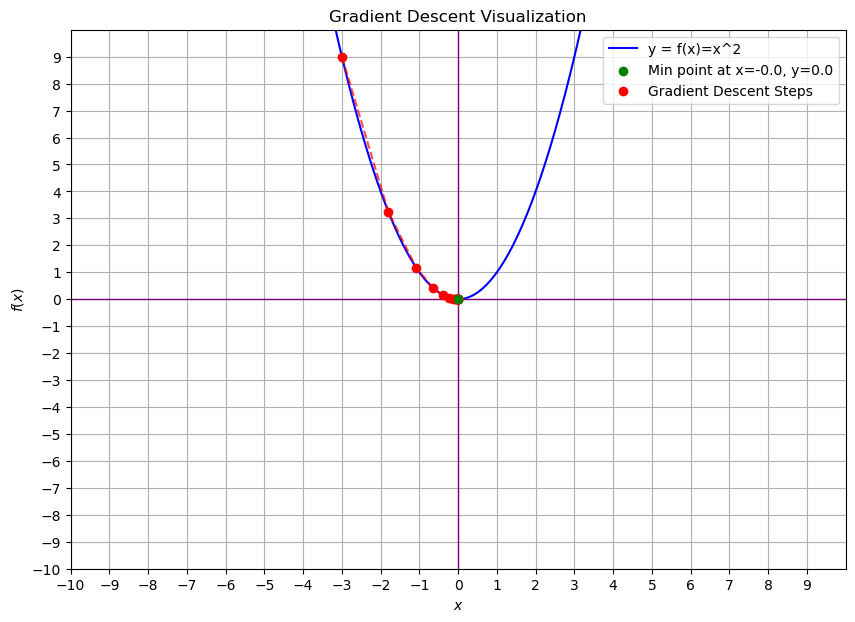

In [3]:
gradient_descent(lambda x: x**2, lambda x: 2*x, start_point=-3, max_steps=50, learning_rate=0.2, func_str="f(x)=x^2")

$$ 2nd \ function: $$
$$ f(x) = \frac{x^2 + 2x}{x-1}  $$
$$ 1st \ derivative $$
$$ \frac{\partial \text{f}} {\partial \text{x}} = \frac{x^2-2x-2}{x^2-2x+1} $$

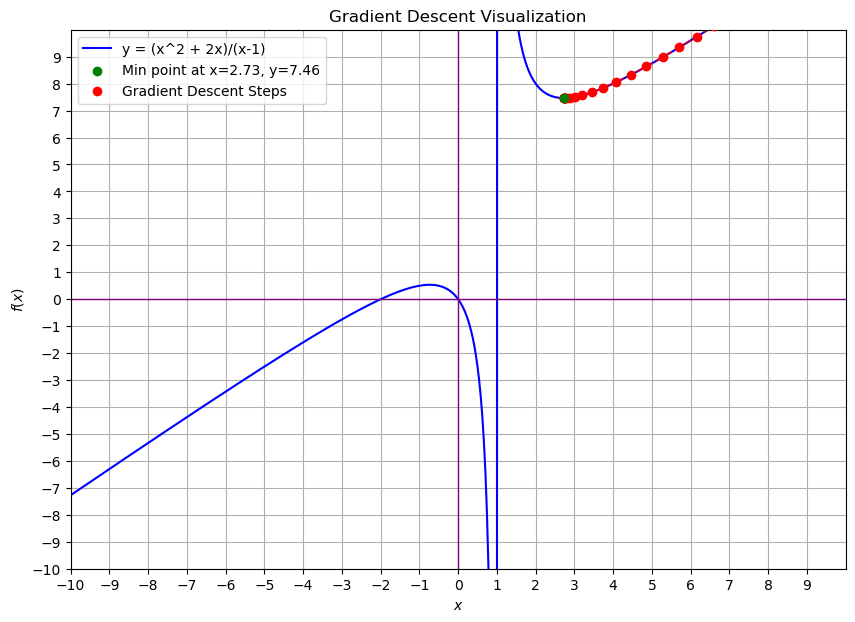

In [4]:
gradient_descent(lambda x: (x**2 + 2*x)/(x-1), lambda x: (x**2-2*x-2)/(x**2-2*x+1), start_point=8, max_steps=100, learning_rate=0.5,
                 func_str="(x^2 + 2x)/(x-1)")

$$ 3rd \ function: $$
$$ f(x) = \frac{x-1}{x^2-2x+2} $$
$$ 1st \ derivative: $$
$$ \frac{\partial \text{f}}{\partial \text{x}} = \frac{-x^2+2x}{(x^2-2x+2)^2} $$

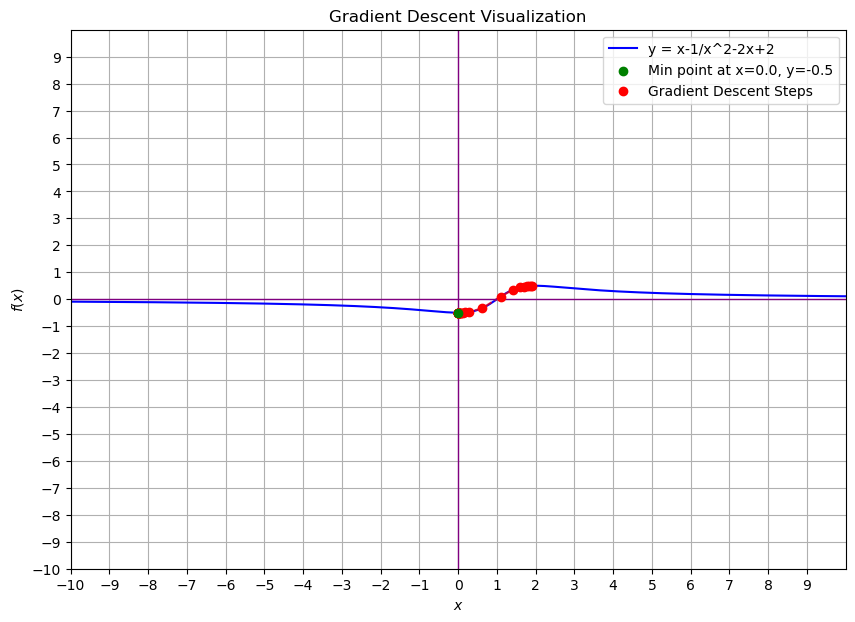

In [5]:
gradient_descent(lambda x: (x-1)/(x**2-2*x + 2), lambda x: (-x**2 + 2*x)/((x**2 -2*x + 2)**2), start_point=1.9, max_steps=100, learning_rate=0.5, func_str="x-1/x^2-2x+2")

 - The third function (diagram above) has a global minimum at x=0 and a global maximum at x=2. The problem with the gradient descent method in this case is that if we set the starting point exactly at x=2 (the global maximum), no matter how many steps we take, the point won't move in the direction of the local minimum. In this example, the starting point is set to x=1.9, just 0.1 below 2, allowing it to find its way to the local minimum, which also happens to be the global minimum.

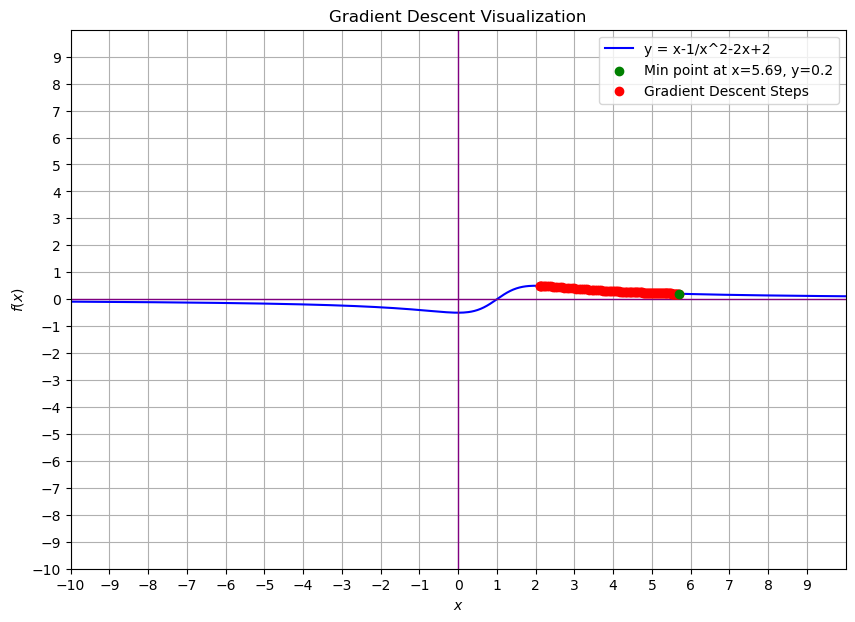

In [6]:
gradient_descent(lambda x: (x-1)/(x**2-2*x + 2), lambda x: (-x**2 + 2*x)/((x**2 -2*x + 2)**2), start_point=2.1, max_steps=100, learning_rate=0.5, func_str="x-1/x^2-2x+2")

 - In the diagram above, we can see that if we set our starting point to be just 0.1 above the global maximum (2), the gradient takes the direction toward the local minimum which is not the global min. The negative gradient always moves in the direction of the decreasing function.

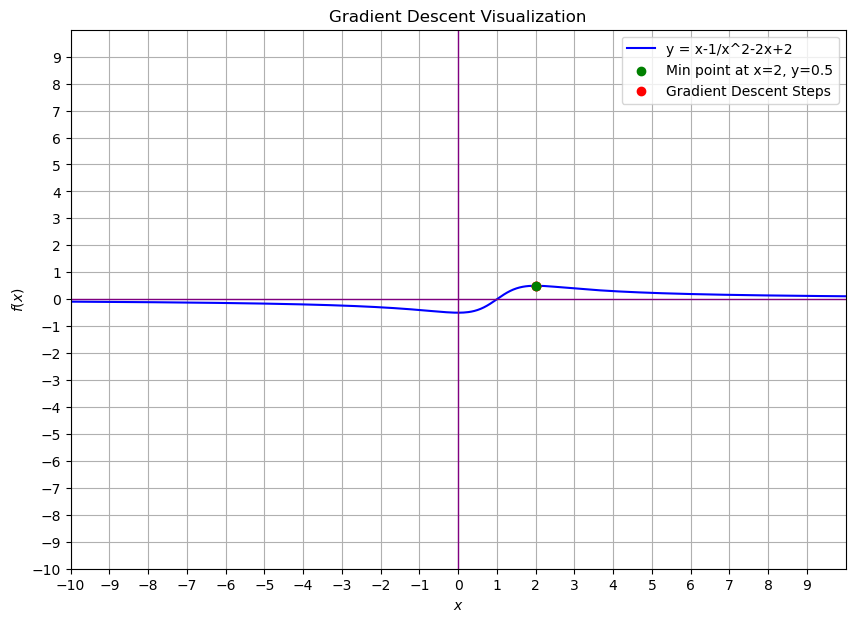

In [7]:
gradient_descent(lambda x: (x-1)/(x**2-2*x + 2), lambda x: (-x**2 + 2*x)/((x**2 -2*x + 2)**2), start_point=2, max_steps=100, learning_rate=0.5, func_str="x-1/x^2-2x+2")

 - Finally, in the diagram above, we can see that if we set our starting point at the global maximum, the gradient won't move, regardless of how many steps we set it to take. Because at that point the function does not decrease and the gradient is zero.

### 4. Gradient Descent on functions with multiple variables:
 - The main method contains the same parameters, with only change to the starting point, where a point has values for "x" and "y" because multi variable functions are three dimensional.

In [8]:
def multi_var_grad_desc(func, f_prime, start_point, learning_rate, max_steps, func_str):
    x_vals, y_vals, z_vals = [], [], []

    x, y = start_point
    for _ in range(max_steps):
        x_vals.append(x)
        y_vals.append(y)
        z_vals.append(func(x, y))

        grad_x, grad_y = f_prime(x, y)
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y

    # Create a grid for plotting the function surface and contours
    x_range = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 100)
    y_range = np.linspace(min(y_vals) - 1, max(y_vals) + 1, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = func(X, Y)
    
    x_min, y_min, z_min = x_vals[-1], y_vals[-1], z_vals[-1]

    fig = plt.figure(figsize=(12, 6))

    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, label=f"f(x, y) = {func_str}")
    ax1.plot(x_vals, y_vals, z_vals, color='red', marker='o', markersize=3, label='Gradient Descent Path')
    ax1.set_title('Gradient Descent Visualization')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('f(X, Y)')
    ax1.legend()

    ax2 = fig.add_subplot(122)
    ax2.contour(X, Y, Z, levels=50, cmap='viridis')
    ax2.plot(x_vals, y_vals, color='red', marker='o', markersize=3, label='Gradient Descent Path')
    ax2.scatter(x_min, y_min, color='green', label=f"Min point at x={round(x_min, 2)}, y={round(y_min, 2)}, z={round(z_min, 2)}", zorder=6)
    ax2.set_title('Contour Plot with Gradient Descent Path')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.legend()

    plt.tight_layout()
    plt.show()
 

$$1st \ function:$$
$$f(x, y) = x^2 + y^2 $$
$$ 1st \ derivative: $$
$$\frac{\partial \text{f}}{\partial \text{x}} = 2x \ ; \ \frac{\partial \text{f}}{\partial \text{y}} = 2y $$

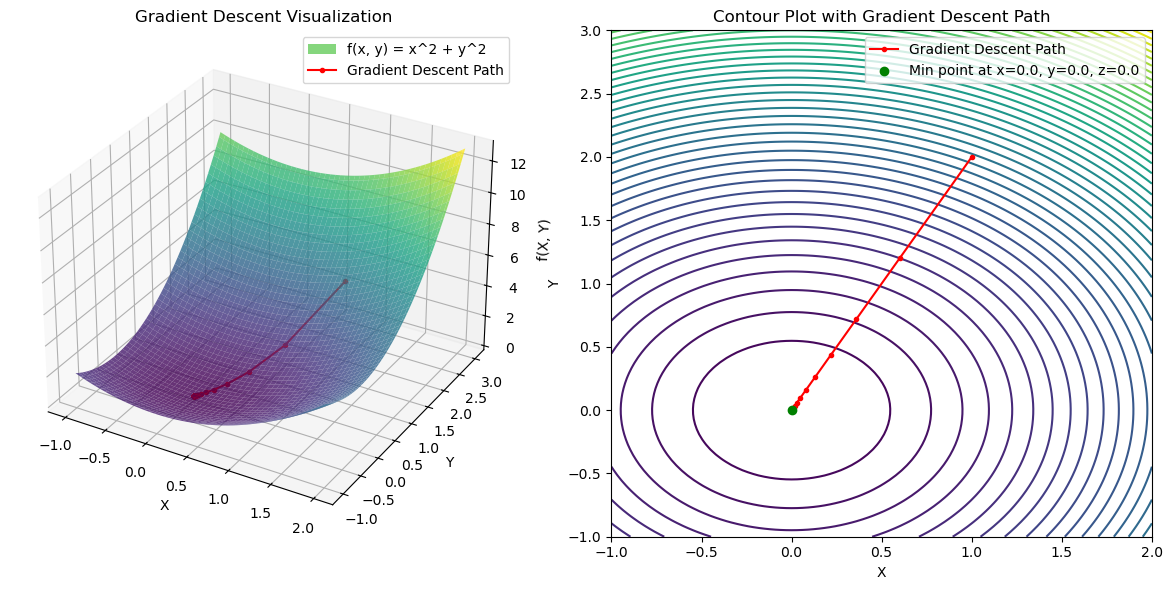

In [9]:
multi_var_grad_desc(lambda x, y:x**2 + y**2, 
                    lambda x, y: (2*x, 2*y), 
                    start_point=(1,2), 
                    learning_rate=0.2, 
                    max_steps = 50,
                    func_str="x^2 + y^2")

$$ 2nd \ function: $$
$$ f(x, y) = 10-3x^2 -2y^2 +8y + 12x $$
$$ 1st \ derivative: $$
$$ \frac{\partial \text{f}}{\partial \text{x}} = -6x + 12 \ ; \ \frac{\partial \text{f}}{\partial \text{y}} = -4y + 8 $$

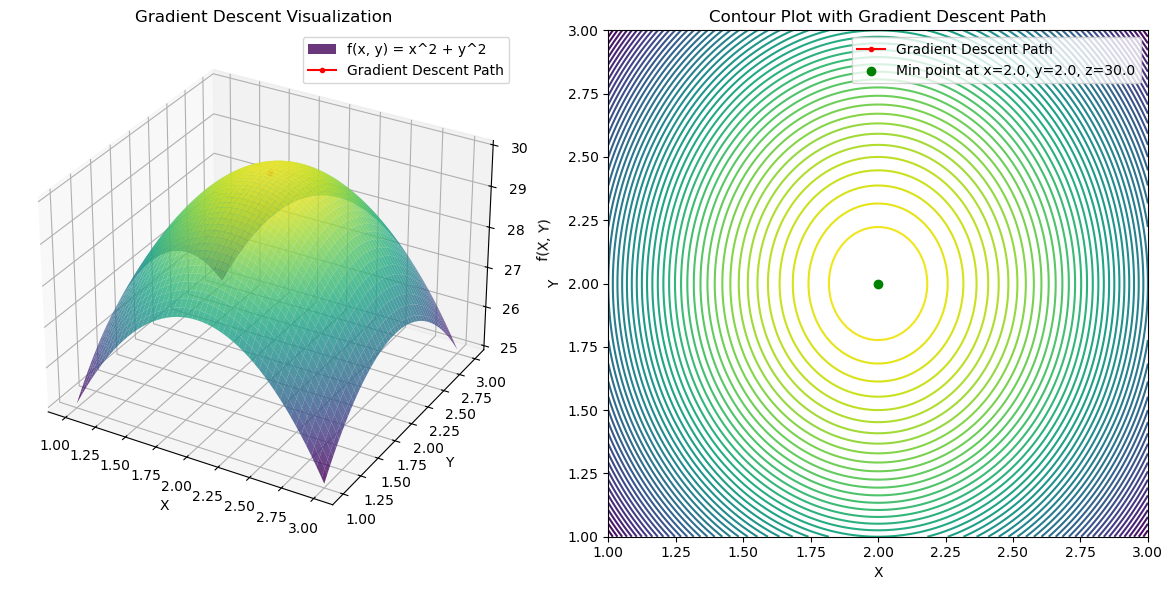

In [10]:
multi_var_grad_desc(lambda x, y:10 - 3*x**2 - 2*y**2 + 8*y + 12*x, 
                    lambda x, y: (-6*x + 12, -4*y + 8), 
                    start_point=(2,2), 
                    learning_rate=0.2, 
                    max_steps = 50,
                    func_str="x^2 + y^2")

 - The diagram above has a global maximum at x=2, y=2, which i calculated by hand, and i set the starting point to be (2, 2), otherwise if this point takes different coordinates, the gradient will move towards infinity, because this function does not have global minimum.

$$ 3rd \ function:$$
$$ f(x, y) = 2x^4 -2y^4 -8xy + 12 $$
$$ 1st \ derivative: $$
$$ \frac{\partial \text{f}}{\partial \text{x}} = 8x^3 - 8y \ ;\ \frac{\partial \text{f}}{\partial \text{y}} = -8y^3 - 8x $$

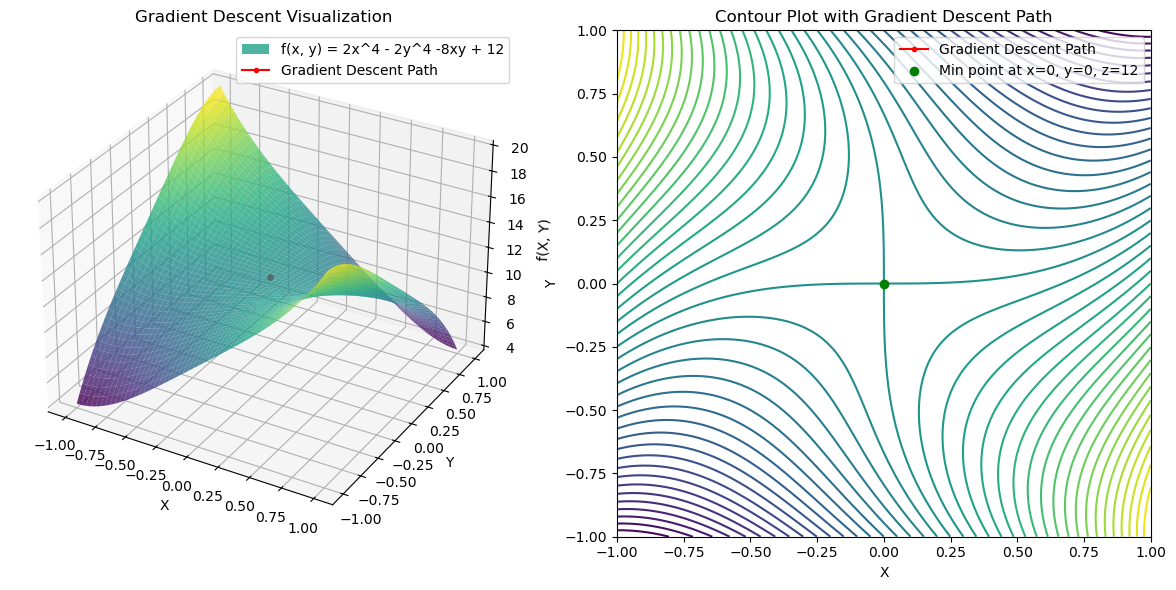

In [11]:
multi_var_grad_desc(lambda x, y:2*x**4 - 2*y**4 - 8*x*y + 12, 
                    lambda x, y: (8*x**3 - 8*y, -8*y**3 - 8*x), 
                    start_point=(0, 0), 
                    learning_rate=1, 
                    max_steps = 10,
                    func_str="2x^4 - 2y^4 -8xy + 12")

 - The second function (diagram above) is interesting. Point (0,0) happens to be a saddle point. Saddle point is neither a local minimum nor a local maximum, instead, the function has a mixed behavior around the saddle point, it decreases in some directions and increases in other directions.
 So in this case we dont have global min/max but instead the function decreases to negative infinity as y^4 dominates x^4 and function. increases to positive infinity as x^4 dominates y^4.


 - Point greather than (0, 0) generates very big decimal number and the PC can not compute it. This is becase the degree of the polynomial  is high.

### 5.Basic example of ML flow, by applying Gradient Descent.
 - The example categorize as Binary Classification.

- The goal is to train a computer to distinguish between cats and dogs that have the same body length. If it were about comparing big dogs to cats, a program could easily recognize the difference. However, the idea is to compare objects with similar physical appearance but distinct characteristics.
- proportion metrics in the table below, are chosen by me. They can be modified, and it will still function properly.


|     |  Body Length  | Head Length Ratio |Ear Height Ratio|Legs Length Ratio|Tail Length Ratio|
|-----|:-------------:|-----------------:|----------------:|----------------:|----------------:|
| Dog |45 cm| between 12 cm and 18 cm / 45 cm|between 10 cm and 15 cm / 45 cm |between 30 cm and 42 cm / 45 cm |between 15 cm and 20 cm / 45 cm|
| Cat |45 cm| between 10 cm and 12 cm / 45 cm|between 5 cm and 10 cm / 45 cm |between 17 cm and 25 cm / 45 cm |between 20 cm and 37 cm / 45 cm|


 - Numerical representation of Dog and Cat.

In [12]:
class Dog:
  def __init__(self):
    self.body_length = 45
    self.head_length = np.round(np.random.uniform(12, 18) / self.body_length, 2)
    self.ear_height = np.round(np.random.uniform(10, 15) / self.body_length, 2)
    self.leg_length = np.round(np.random.uniform(30, 42) / self.body_length, 2)
    self.tail_length = np.round(np.random.uniform(5, 20) / self.body_length, 2)
    
class Cat:
  def __init__(self):
    self.body_length = 45
    self.head_length = np.round(np.random.uniform(10, 12) / self.body_length, 2)
    self.ear_height = np.round(np.random.uniform(5, 10) / self.body_length, 2)
    self.leg_length = np.round(np.random.uniform(17, 25) / self.body_length, 2)
    self.tail_length = np.round(np.random.uniform(20, 37) / self.body_length, 2)

 - Generating artificial data of 10 dogs and 10 cats.The data will be used later in the code to adjust the weights .

In [13]:
dogs_vector = []
cats_vector = []
for _ in range(10):
  
  dog = Dog()
  cat = Cat()
  
  dog_model = np.array([
  dog.head_length,
  dog.ear_height,
  dog.leg_length,
  dog.tail_length
  ]                      
)
  cat_model = np.array([
  cat.head_length,
  cat.ear_height,
  cat.leg_length,
  cat.tail_length
  ]
)
  dogs_vector.append(dog_model)
  cats_vector.append(cat_model)

phi_vec_dogs = np.array(dogs_vector)
phi_vec_cats = np.array(cats_vector)

 - Gradient Descent typically does not perform well with larger values, so im scaling the data by using Min-Max Normalization function.

In [14]:
def normalize_data(values):
  min_value = np.min(values)
  max_value = np.max(values)
  return np.array([np.round((value - min_value) / (max_value - min_value), 4) for value in values])

dogs = normalize_data(phi_vec_dogs)
cats = normalize_data(phi_vec_cats)


In [15]:
print(dogs)
print()
print(cats)

[[0.2727 0.2078 0.7532 0.3247]
 [0.1688 0.2208 0.987  0.1299]
 [0.1948 0.1039 0.9351 0.    ]
 [0.1948 0.1429 0.6883 0.0649]
 [0.3117 0.2078 0.7143 0.0519]
 [0.2078 0.1948 1.     0.3377]
 [0.1558 0.2078 0.9481 0.1948]
 [0.2597 0.1299 0.7922 0.2338]
 [0.2597 0.1299 0.7792 0.2597]
 [0.1818 0.2078 0.8182 0.2338]]

[[0.2    0.0714 0.4143 0.9429]
 [0.2143 0.1286 0.4143 0.8143]
 [0.1857 0.1143 0.5714 0.9429]
 [0.1857 0.1143 0.5    0.4714]
 [0.1571 0.0286 0.4857 0.8286]
 [0.1714 0.1    0.4286 0.7   ]
 [0.1714 0.0571 0.6143 0.5286]
 [0.1571 0.0571 0.4571 0.9714]
 [0.2143 0.     0.4857 1.    ]
 [0.2    0.0143 0.3714 0.6714]]


 - Mergin both vectors in one

In [16]:
predictions = np.concatenate([dogs, cats])
predictions

array([[0.2727, 0.2078, 0.7532, 0.3247],
       [0.1688, 0.2208, 0.987 , 0.1299],
       [0.1948, 0.1039, 0.9351, 0.    ],
       [0.1948, 0.1429, 0.6883, 0.0649],
       [0.3117, 0.2078, 0.7143, 0.0519],
       [0.2078, 0.1948, 1.    , 0.3377],
       [0.1558, 0.2078, 0.9481, 0.1948],
       [0.2597, 0.1299, 0.7922, 0.2338],
       [0.2597, 0.1299, 0.7792, 0.2597],
       [0.1818, 0.2078, 0.8182, 0.2338],
       [0.2   , 0.0714, 0.4143, 0.9429],
       [0.2143, 0.1286, 0.4143, 0.8143],
       [0.1857, 0.1143, 0.5714, 0.9429],
       [0.1857, 0.1143, 0.5   , 0.4714],
       [0.1571, 0.0286, 0.4857, 0.8286],
       [0.1714, 0.1   , 0.4286, 0.7   ],
       [0.1714, 0.0571, 0.6143, 0.5286],
       [0.1571, 0.0571, 0.4571, 0.9714],
       [0.2143, 0.    , 0.4857, 1.    ],
       [0.2   , 0.0143, 0.3714, 0.6714]])

 - Generating true values, 1=Dog, 0=Cat

In [17]:
dog_targets = np.ones(10)
cat_targets = np.zeros(10)

targets = np.concatenate([dog_targets, cat_targets])
targets

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

 - Im using Logistic Regression for this binary classification problem and more specifically Logarithmic loss function.

In [18]:
def loss_func(predictions, targets):
  return np.round(-np.mean(targets * np.log(predictions) + (1 - targets) * np.log(1 - predictions)), 3)

 - Calculating the Gradiend of the Loss function.

In [19]:
def gradient(predictions, targets, weight_vec):
  targets = targets.reshape(-1, 1)
  grad =  ((predictions * weight_vec) - targets) * predictions
  return sum(grad) / len(targets)

 - Im using sigmoid function as activation function, to squeez the output to 1 and 0

In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

 - Picking random decimal numbers for the weight vector, usually with mean value zero and standard deviation of one
 - Also picking a number for the learning rate or steps for the gradient.

In [21]:
weight_vec = np.array([1.5, 2, 0.1, -0.2])
learning_rate = .5

 - Lastly, weights update algorithm

In [22]:
max_iterations = 100
for _ in range(max_iterations):
  z = predictions @ weight_vec
  y_pred = sigmoid(z)
  loss = loss_func(y_pred, targets)
  grad = (1 / len(predictions)) * predictions.T @ (y_pred - targets)
  weight_vec -= learning_rate * grad
  
print(f"Loss after {max_iterations} iterations: {loss}")

Loss after 100 iterations: 0.191


 - Generating artificial data for testing.
 - 5 Dogs / 5 Cats

In [23]:
test_dog_models = [np.array([
    np.round(np.random.uniform(14, 18) / 45, 2),
    np.round(np.random.uniform(11, 15) / 45, 2),
    np.round(np.random.uniform(30, 42) / 45, 2),
    np.round(np.random.uniform(5, 20) / 45, 2)
]) for _ in range(5)]

test_cat_models = [np.array([
    np.round(np.random.uniform(10, 12) / 45, 2),
    np.round(np.random.uniform(5, 10) / 45, 2),
    np.round(np.random.uniform(17, 25) / 45, 2),
    np.round(np.random.uniform(20, 37) / 45, 2)
]) for _ in range(5)]

 - Generating true values for testing.

In [24]:
test_dogs_true_values = np.ones(5)
test_cats_true_values = np.zeros(5)

In [25]:
print(test_dogs_true_values)
print(test_cats_true_values)

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [26]:
print(test_dog_models)
print(test_cat_models)

[array([0.35, 0.32, 0.88, 0.22]), array([0.36, 0.26, 0.86, 0.19]), array([0.33, 0.3 , 0.84, 0.19]), array([0.34, 0.25, 0.75, 0.26]), array([0.39, 0.29, 0.92, 0.4 ])]
[array([0.23, 0.15, 0.54, 0.45]), array([0.25, 0.17, 0.46, 0.79]), array([0.23, 0.19, 0.45, 0.7 ]), array([0.25, 0.17, 0.4 , 0.55]), array([0.23, 0.13, 0.52, 0.61])]


 - Generating test targets/observed data

In [27]:
test_d_targets = [(tuple(model), true_value) for model, true_value in zip(test_dog_models, test_dogs_true_values)]
test_c_targets = [(tuple(model), true_value) for model, true_value in zip(test_cat_models, test_cats_true_values)]

In [28]:
print(test_d_targets)
print(test_c_targets)

[((0.35, 0.32, 0.88, 0.22), 1.0), ((0.36, 0.26, 0.86, 0.19), 1.0), ((0.33, 0.3, 0.84, 0.19), 1.0), ((0.34, 0.25, 0.75, 0.26), 1.0), ((0.39, 0.29, 0.92, 0.4), 1.0)]
[((0.23, 0.15, 0.54, 0.45), 0.0), ((0.25, 0.17, 0.46, 0.79), 0.0), ((0.23, 0.19, 0.45, 0.7), 0.0), ((0.25, 0.17, 0.4, 0.55), 0.0), ((0.23, 0.13, 0.52, 0.61), 0.0)]


 - Lastly output method for testing.

In [29]:
def predict(test_d_targets, test_c_targets, weight_vec):
  for i in range(len(test_c_targets)):
    dog_prediction = sigmoid(test_d_targets[i][0] @ weight_vec)
    cat_prediction = sigmoid(test_c_targets[i][0] @ weight_vec)
    
    dog_target = test_d_targets[i][1]
    cat_target = test_c_targets[i][1]
    
    if dog_target == round(dog_prediction):
      print(f"Target: {dog_target}\nPrediction: {round(dog_prediction)} -> Dog")
      print(f"Score: {dog_prediction}")
      print()
      
    if cat_target == round(cat_prediction):
      print(f"Target: {cat_target}\nPrediction: {round(cat_prediction)} -> Cat")
      print(f"Score: {cat_prediction}")
      print()

 - Testing.

In [30]:
predict(test_d_targets, test_c_targets, weight_vec)

Target: 1.0
Prediction: 1 -> Dog
Score: 0.9002373478482031

Target: 0.0
Prediction: 0 -> Cat
Score: 0.49714343219132384

Target: 1.0
Prediction: 1 -> Dog
Score: 0.8950833166817064

Target: 0.0
Prediction: 0 -> Cat
Score: 0.18993135015890725

Target: 1.0
Prediction: 1 -> Dog
Score: 0.8965787982952401

Target: 0.0
Prediction: 0 -> Cat
Score: 0.2518989403991858

Target: 1.0
Prediction: 1 -> Dog
Score: 0.8308334022973174

Target: 0.0
Prediction: 0 -> Cat
Score: 0.35396705564261055

Target: 1.0
Prediction: 1 -> Dog
Score: 0.8235209744876811

Target: 0.0
Prediction: 0 -> Cat
Score: 0.3219362940124873

